In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from darts.metrics import mse, mae, rmse
from darts.models import ARIMA
from darts.models import ExponentialSmoothing
from darts import TimeSeries
from darts.utils.utils import SeasonalityMode

In [2]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

## Read dataset

In [4]:
path_processed = "processed/tuntidata_processed.csv"

df_waste = pd.read_csv(path_processed, header=0)

df_waste.head(10)

,date,weekday,hour,datetime,quantity
0,2023-01-02,0,10,2023-01-02 10:00:00,18.0
1,2023-01-02,0,11,2023-01-02 11:00:00,83.0
2,2023-01-02,0,12,2023-01-02 12:00:00,79.0
3,2023-01-02,0,13,2023-01-02 13:00:00,90.0
4,2023-01-02,0,14,2023-01-02 14:00:00,1.0
5,2023-01-03,1,10,2023-01-03 10:00:00,26.0
6,2023-01-03,1,11,2023-01-03 11:00:00,88.0
7,2023-01-03,1,12,2023-01-03 12:00:00,94.0
8,2023-01-03,1,13,2023-01-03 13:00:00,108.0
9,2023-01-03,1,14,2023-01-03 14:00:00,10.0


# Forecast

In [6]:
freq = pd.offsets.CustomBusinessHour(start="10:00", end="15:00", weekmask="Mon Tue Wed Thu Fri")
a = TimeSeries.from_dataframe(df=df_waste, time_col='datetime', value_cols='quantity', freq=freq, fillna_value=0)

<Axes: xlabel='datetime'>

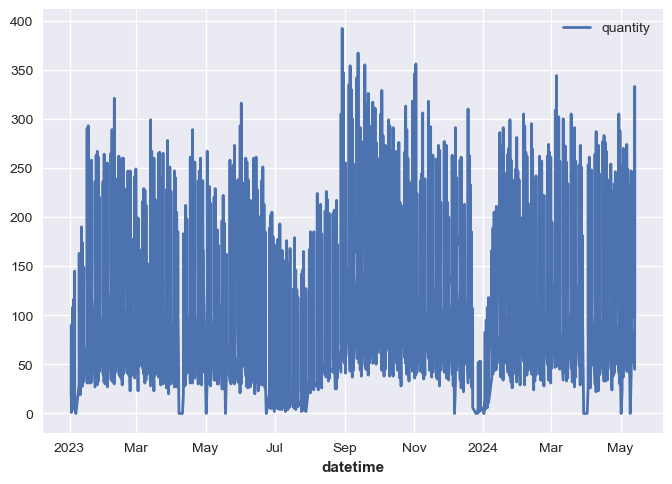

In [7]:
a.plot()

In [8]:
cutoff_date = pd.to_datetime('2024-02-01')
train_set, test_set = a.split_before(cutoff_date)

<Axes: xlabel='datetime'>

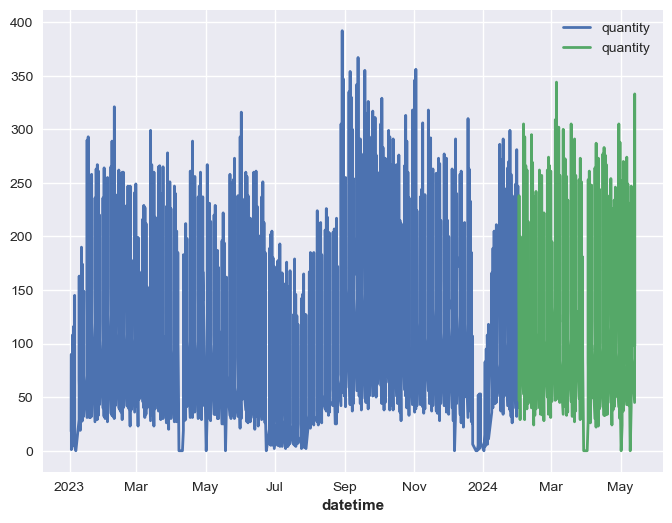

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

train_set.plot(ax=ax)
test_set.plot(ax=ax)

In [10]:
def get_metrics(gt, pred):
    print(f"MSE : {mse(gt, pred):.5f}")
    print(f"RMSE: {rmse(gt, pred):.5f}")
    print(f"MAE : {mae(gt, pred):.5f}")

## Exponential Smoothing

MSE : 12588.56944
RMSE: 112.19879
MAE : 92.61824


<Axes: xlabel='datetime'>

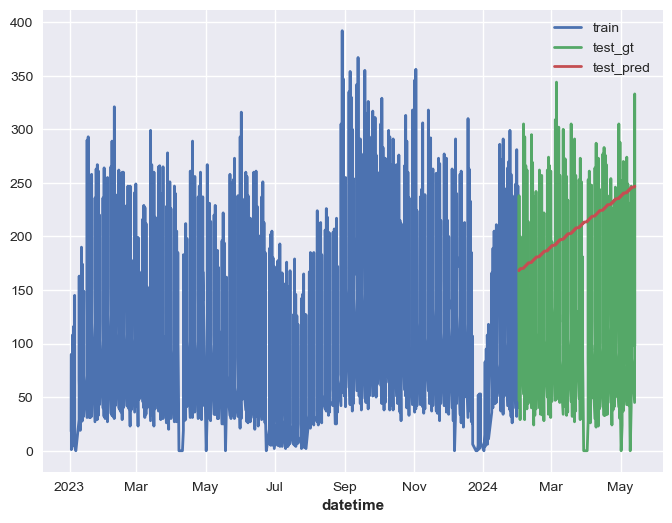

In [11]:
model = ExponentialSmoothing(seasonal=SeasonalityMode.NONE)

model.fit(train_set)
pred = model.predict(len(test_set))

get_metrics(test_set, pred)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

train_set.plot(ax=ax, label='train')
test_set.plot(ax=ax, label='test_gt')
pred.plot(ax=ax, label='test_pred')

### ARIMA with encoders

MSE : 3879.33165
RMSE: 62.28428
MAE : 45.17520


<Axes: xlabel='datetime'>

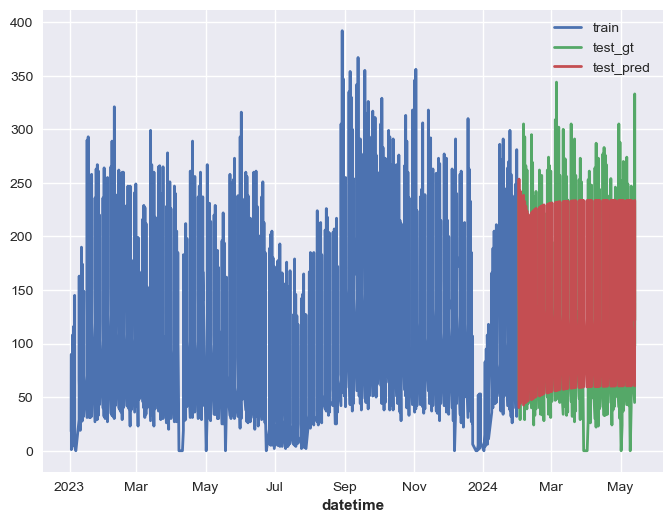

In [12]:
add_encoders = {
    'cyclic': {'future': ['hour']},
    # 'datetime_attribute': {'future': ['hour', 'dayofweek']},
}


model = ARIMA(add_encoders=add_encoders)
model.fit(train_set)
pred = model.predict(len(test_set))

get_metrics(test_set, pred)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

train_set.plot(ax=ax, label='train')
test_set.plot(ax=ax, label='test_gt')
pred.plot(ax=ax, label='test_pred')

### Bare ARIMA

MSE : 5132.14459
RMSE: 71.63899
MAE : 58.70525


<Axes: xlabel='datetime'>

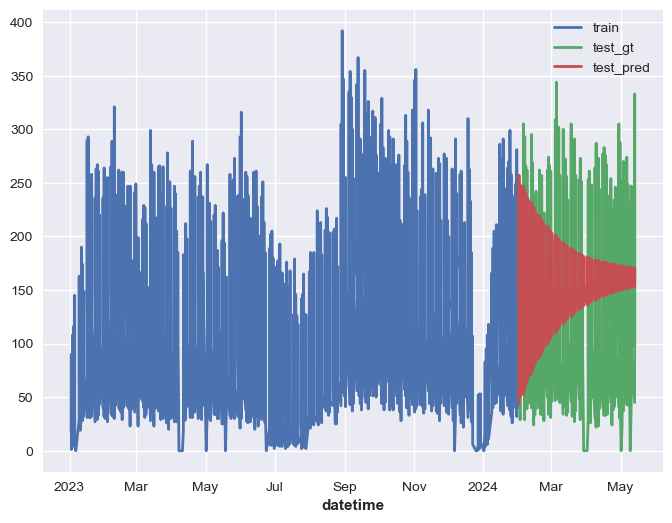

In [13]:
add_encoders = {
    # 'cyclic': {'future': ['hour']},
    # 'datetime_attribute': {'future': ['hour', 'dayofweek']},
}


model = ARIMA(add_encoders=add_encoders)
model.fit(train_set)
pred = model.predict(len(test_set))

get_metrics(test_set, pred)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

train_set.plot(ax=ax, label='train')
test_set.plot(ax=ax, label='test_gt')
pred.plot(ax=ax, label='test_pred')

In [14]:
model.backtest(test_set)

/home/hoanghu/miniforge3/envs/py/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hoanghu/miniforge3/envs/py/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hoanghu/miniforge3/envs/py/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hoanghu/miniforge3/envs/py/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to 

KeyboardInterrupt: 